In [1]:
from photon_library import PhotonLibrary

# try help
help(PhotonLibrary)

In [2]:
plib = PhotonLibrary()

## Playing with PhotonLibrary
First off, let's see the size of the voxelized volume in cartesian coordinate [cm]

In [3]:
# photon library volume range
print("PhotonLib volume range")
print('Min:',plib.BoundaryMin())
print('Max:',plib.BoundaryMax())

PhotonLib volume range
Min: [-405. -215. -985.]
Max: [-35. 170. 985.]


... and number of voxels along each axis

In [4]:
print(plib.NumVoxels(),'voxels along x,y,z respectively')

[ 74  77 394] voxels along x,y,z respectively


Not needed but if you want a quick visualization of a 2D slice of the visibility map, there's a method

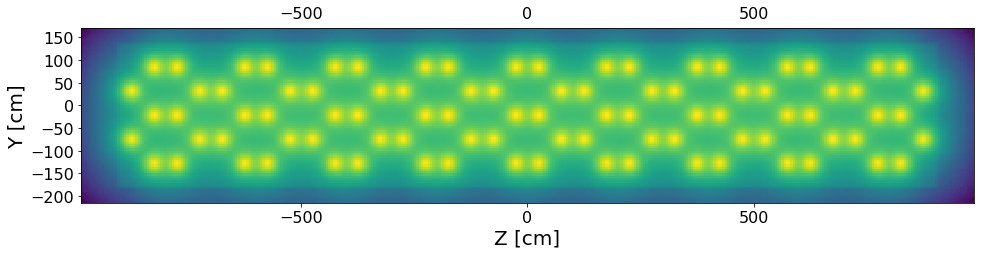

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

# Below makes a YZ slice made at x=0.1 in fractional location (i.e. x = x_min + (x_max - x_min)*0.1)
fig=plib.PlotVisibility2D('x',0.1)

plt.show()

## Challenge

**Goal** of the challenge is to come up with a learnable model that can accurately reproduce the knowledge (i.e. visibility per optical detector) of a PhotonLibrary. 


In order to train, you might want to randomly sample the position inside the detector with the "truth" = visibility per optical detector. Use `UniformSample` attribute function for this.

In [6]:
help(plib.UniformSample)

Help on method UniformSample in module photon_library:

UniformSample(num_points=32, use_numpy=True, use_world_coordinate=False) method of photon_library.PhotonLibrary instance
    Samples visibility for a specified number of points uniformly sampled within the voxelized volume
    INPUT
      num_points - number of points to be sampled
      use_numpy - if True, the return is in numpy array. If False, the return is in torch Tensor
      use_world_coordinate - if True, returns absolute (x,y,z) position. Else fractional position is returned.
    RETURN
      An array of position, shape (num_points,3)
      An array of visibility, shape (num_points,180)



In [7]:
import time
import numpy as np
np.random.seed(123)

t0=time.time()
for i in range(30):
    t0=time.time()
    pos,vis = plib.UniformSample(num_points=32, use_numpy=True, use_world_coordinate=False)
    print('Batch %-2d Time %.5f [s]' % (i,time.time()-t0))

print('Shape of positions',pos.shape)
print('Shape of visibility',vis.shape)

Batch 0  Time 0.00058 [s]
Batch 1  Time 0.00042 [s]
Batch 2  Time 0.00040 [s]
Batch 3  Time 0.00036 [s]
Batch 4  Time 0.00027 [s]
Batch 5  Time 0.00028 [s]
Batch 6  Time 0.00038 [s]
Batch 7  Time 0.00052 [s]
Batch 8  Time 0.00033 [s]
Batch 9  Time 0.00033 [s]
Batch 10 Time 0.00048 [s]
Batch 11 Time 0.00060 [s]
Batch 12 Time 0.00052 [s]
Batch 13 Time 0.00043 [s]
Batch 14 Time 0.00068 [s]
Batch 15 Time 0.00056 [s]
Batch 16 Time 0.00124 [s]
Batch 17 Time 0.00110 [s]
Batch 18 Time 0.00090 [s]
Batch 19 Time 0.00055 [s]
Batch 20 Time 0.00053 [s]
Batch 21 Time 0.00043 [s]
Batch 22 Time 0.00036 [s]
Batch 23 Time 0.00038 [s]
Batch 24 Time 0.00039 [s]
Batch 25 Time 0.00035 [s]
Batch 26 Time 0.00036 [s]
Batch 27 Time 0.00034 [s]
Batch 28 Time 0.00033 [s]
Batch 29 Time 0.00033 [s]
Shape of positions (32, 3)
Shape of visibility (32, 180)
